# 2. 특이값 분해(SVD, Singular Value Decomposion)
* PCA는 항상 정방행렬이여야만 하지만, SDV는 정방행렬이 아니여도 가능하다! 

In [1]:
import numpy as np
A = np.array([[1,0,0,0,2],
              [0,0,3,0,0],
              [0,0,0,0,0],
              [0,2,0,0,0]])

## 2.1 특이값 분해

In [2]:
import numpy as np

# SVD
U, s, VT = np.linalg.svd(A)

print("U:\n {}".format(U))
print("s:\n {}".format(s))
print("VT:\n {}".format(VT))

U:
 [[ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0. -1.]
 [ 0.  0.  1.  0.]]
s:
 [3.         2.23606798 2.         0.        ]
VT:
 [[-0.          0.          1.          0.          0.        ]
 [ 0.4472136   0.          0.          0.          0.89442719]
 [-0.          1.          0.          0.          0.        ]
 [ 0.          0.          0.          1.          0.        ]
 [-0.89442719  0.          0.          0.          0.4472136 ]]


In [5]:
import numpy as np

a = np.array([[1,1,1,0,0],
             [3,3,3,0,0],
             [4,4,4,0,0],
             [5,5,5,0,0],
             [0,2,0,4,4],
             [0,0,0,5,5],
             [0,1,0,2,2]])

U, s, VT = np.linalg.svd(a)

print("U:\n {}".format(U))
print("s:\n {}".format(s))
print("VT:\n {}".format(VT))

U:
 [[-1.37599126e-01  2.36114514e-02  1.08084718e-02  9.90147543e-01
  -1.26568534e-16 -1.26568534e-16  0.00000000e+00]
 [-4.12797378e-01  7.08343543e-02  3.24254153e-02 -5.94088526e-02
  -8.85034377e-01  1.91609371e-01  0.00000000e+00]
 [-5.50396503e-01  9.44458057e-02  4.32338870e-02 -7.92118034e-02
   4.24264069e-01  7.07106781e-01  0.00000000e+00]
 [-6.87995629e-01  1.18057257e-01  5.40423588e-02 -9.90147543e-02
   1.91609371e-01 -6.80651048e-01  0.00000000e+00]
 [-1.52775087e-01 -5.91100963e-01 -6.53650843e-01 -9.73880310e-17
   4.77815907e-17 -1.00067988e-17 -4.47213595e-01]
 [-7.22165140e-02 -7.31311857e-01  6.78209218e-01  4.93038066e-32
  -7.10764783e-17  0.00000000e+00  0.00000000e+00]
 [-7.63875433e-02 -2.95550482e-01 -3.26825421e-01 -4.86940155e-17
  -3.16203559e-17 -5.00339942e-18  8.94427191e-01]]
s:
 [1.24810147e+01 9.50861406e+00 1.34555971e+00 1.84716760e-16
 9.74452038e-33]
VT:
 [[-5.62258405e-01 -5.92859901e-01 -5.62258405e-01 -9.01335372e-02
  -9.01335372e-02]
 [ 1

## 2.2 이미지에 적용한 특이값 분해

Size(dimension):  (1280, 756)


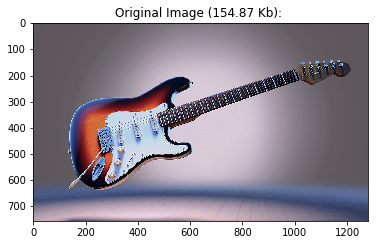

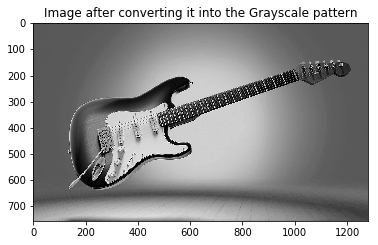

After compression: 


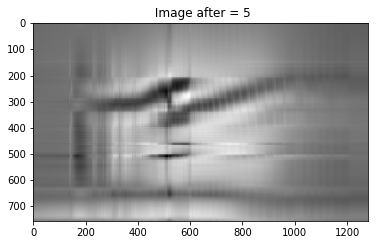

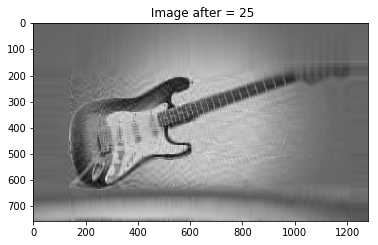

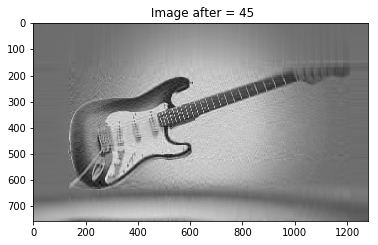

In [10]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

path = 'test_guitar.JPG'

# 이미지 파일 열기
img = Image.open(path)

# 파일 크기 계산
s = float(os.path.getsize(path))/1000
print("Size(dimension): ", img.size)
plt.title("Original Image (%0.2f Kb): " %s)
plt.imshow(img)

# gray 스케일로 변환
imggray = img.convert('LA')
imgmat = np.array( list(imggray.getdata(band = 0)), float)

# 이미지 크기(가로, 세로)로 reshape
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)

plt.figure()
plt.imshow(imgmat, cmap = 'gray')
plt.title("Image after converting it into the Grayscale pattern")
plt.show()

# 특이값 분해 과정
print("After compression: ")
U, S, Vt = np.linalg.svd(imgmat) # single value decomposition

# 5, 25, 45 개의 특이값을 적용하여 이미지 압축
for i in range(5, 51, 20):
    cmpimg = np.matrix(U[:, :i]) * np.diag(S[:i]) * np.matrix(Vt[:i,:]) # size를 맞춰주는 부분 
    # 즉, m * n 의 행렬을 만들어 주는 과정 
    # i by i 의 행렬이고, i의 개수는 대각행렬의 대각성분 개수와 같다. 
    plt.imshow(cmpimg, cmap = 'gray')
    title = " Image after = %s" %i
    plt.title(title)
    plt.show()
    result = Image.fromarray((cmpimg ).astype(np.uint8))